# Avoid overfitting Through Regularisation and Dropout Layers

This tutorial provides example code on how to apply regularisation to the layers of a small neural network as well as dropout layers to prevent overfitting.

In [1]:
# Import keras and other functionality
import tensorflow as tf
from tensorflow import random

tf.keras.backend.clear_session()
random.set_seed(42)

In [2]:
# Load Fashion MNIST data
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

# Select 55,000 datapoints for training and 5,000 datapoints for validation
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [3]:
# Preprocess training and validation data
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

## Use Weight Regularisers

In [4]:
# Create model
model = tf.keras.models.Sequential()

# Create regulariser object with hyperparameter
loss_hyper = 0.1
l2reg = tf.keras.regularizers.L2(loss_hyper)

# Add layers
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
model.add(tf.keras.layers.Dense(300, activation="relu", kernel_regularizer=l2reg))
model.add(tf.keras.layers.Dense(100, activation="relu", kernel_regularizer=l2reg))
model.add(tf.keras.layers.Dense(10, activation="softmax", kernel_regularizer=l2reg))
   
# Compile model
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

# Train model with regularisation
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))


Epoch 1/30


1719/1719 [==============================] - 4s 2ms/step - loss: 10.7948 - accuracy: 0.5748 - val_loss: 2.1285 - val_accuracy: 0.5662
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 2.0502 - accuracy: 0.5405 - val_loss: 2.0168 - val_accuracy: 0.5386
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 2.0141 - accuracy: 0.5461 - val_loss: 1.9996 - val_accuracy: 0.5576
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 2.0022 - accuracy: 0.5526 - val_loss: 1.9889 - val_accuracy: 0.5640
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 1.9942 - accuracy: 0.5493 - val_loss: 1.9871 - val_accuracy: 0.5714
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 1.9891 - accuracy: 0.5483 - val_loss: 1.9871 - val_accuracy: 0.5318
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 1.9850 - accuracy: 0.5439 - val_loss: 1.9794 - val_accur

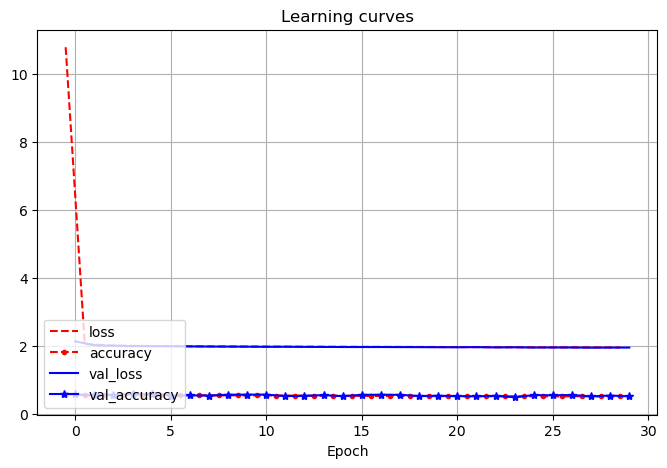

In [5]:
# Create function for plotting learning curves
import numpy as np
import matplotlib.pyplot as plt

def plot_curves(history):
    plt.figure(figsize=(8, 5))
    for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
        epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
        plt.plot(epochs, history.history[key], style, label=key)
    plt.xlabel("Epoch")
    plt.legend(loc="lower left")
    plt.title("Learning curves")
    plt.grid()
    plt.show()

# Plot curves
plot_curves(history)

As you might have noticed the model did not train very well. The loss is too high. This is because we set the hyperparameters for the regulariser to be too high. The model is underfitting! Change the hyperparameters to something much smaller such as 1e-3 or 1e-4 to see the model performing well again. To confirm that the model is underfitting check the accuracy on the training and validation data. It is now 0.5 instead of 0.89 as expected for this dataset with a well trained model.

In [6]:
# Evaluate model on training data
model.evaluate(X_train, y_train)

1719/1719 [==============================] - 2s 1ms/step - loss: 1.9480 - accuracy: 0.5037


[1.9479806423187256, 0.5037272572517395]

In [7]:
# Evaluate model on validation data
model.evaluate(X_valid, y_valid)


157/157 [==============================] - 0s 2ms/step - loss: 1.9454 - accuracy: 0.5076


[1.945406436920166, 0.5076000094413757]

## Use Dropout Layers

Another technique to avoid overfitting is to use dropout layers. The layer takes as input the dropout rate, i.e. the probability of a neuron being dropped out at each training step. This is another hyperparameter you can control.

In [8]:
# Dropout rate hyperparameter
dprate = 0.2

# Create model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dropout(rate=dprate),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dropout(rate=dprate),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dropout(rate=dprate),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [13]:
# Create optimiser object
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Compile model
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

# Train model
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid))

Epoch 1/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3482 - accuracy: 0.8722 - val_loss: 0.3180 - val_accuracy: 0.8834
Epoch 2/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3481 - accuracy: 0.8713 - val_loss: 0.3183 - val_accuracy: 0.8800
Epoch 3/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3445 - accuracy: 0.8735 - val_loss: 0.3143 - val_accuracy: 0.8816
Epoch 4/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3418 - accuracy: 0.8751 - val_loss: 0.3183 - val_accuracy: 0.8802
Epoch 5/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3401 - accuracy: 0.8747 - val_loss: 0.3147 - val_accuracy: 0.8816
Epoch 6/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3426 - accuracy: 0.8738 - val_loss: 0.3181 - val_accuracy: 0.8798
Epoch 7/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3368 - accuracy: 0.8767 - val_loss: 0.3156 - val_accuracy:

In [10]:
# Evaluate on training data
model.evaluate(X_train, y_train)

1719/1719 [==============================] - 2s 1ms/step - loss: 0.2904 - accuracy: 0.8932


[0.290418416261673, 0.8931999802589417]

In [11]:
# Evaluate on validation data
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 0s 1ms/step - loss: 0.3219 - accuracy: 0.8786


[0.3219159245491028, 0.878600001335144]

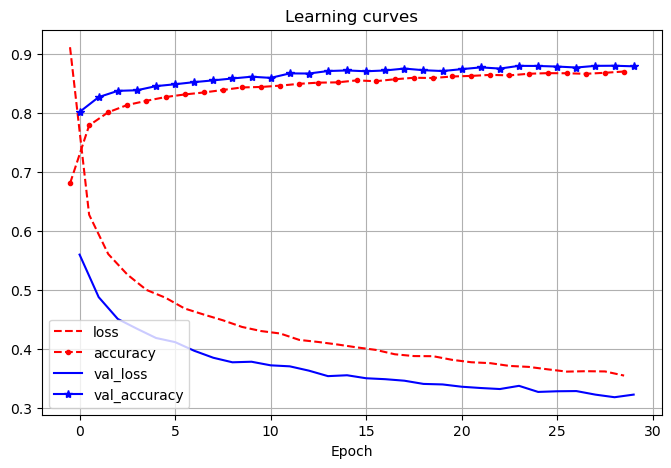

In [12]:
# Plot curves
plot_curves(history)